# Problem Statement

The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. 

In this project, you are given a dataset in the fake-news_data.zip folder. The folder contains a CSV files train_news.csv and you have to use the train_news.csv data to build a model to predict whether a news is fake or not fake. You have to try out different models on the dataset, evaluate their performance, and finally report the best model you got on the data and its performance.

# Data Description

There are 6 columns in the dataset provided to you. The description of each of the column is given below:

    “id”:  Unique id of each news article
    “headline”:  It is the title of the news.
    “news”:  It contains the full text of the news article
    “Unnamed:0”:  It is a serial number
    “written_by”:  It represents the author of the news article
    “label”:  It tells whether the news is fake (1) or not fake (0).

# Importing required libraries

In [1]:
#Basic libraries
import pandas as pd
import numpy as np

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

#Metrics libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, log_loss

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
#Loading the data
df=pd.read_csv('D:/Python file/train_news.csv')  #Path location of the dataset
df.head()  #Checking out the top 5 rows of the dataset

Unnamed: 0     id                                           headline  \
0           0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1           1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2           2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3           3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4           4   7596                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

In [3]:
df.shape    #Checking the dimensions of the dataset

(20800, 6)

In [4]:
#Checking the value counts of the target feature
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

We can see that the data is balanced well, as equal weightage of 0's and 1's are given to the label column so that there is no need to handle the dataset by applying sampling techniques

In [5]:
#Checking the datatypes of the dataset features
df.dtypes

Unnamed: 0     int64
id             int64
headline      object
written_by    object
news          object
label          int64
dtype: object

headline, written_by and news are the columns having object datatype and we need to convert them into numerical data before model building process

In [6]:
#Checking for null values in the dataset
df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

We can see that there are missing data in the object datatype column and we need to handle them.

<AxesSubplot:>

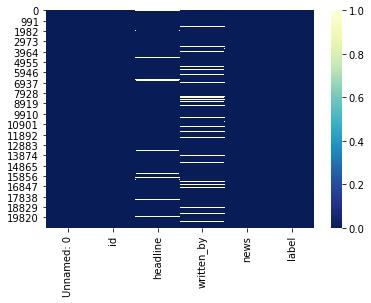

In [7]:
#Plotting heatmap for missing data
sns.heatmap(df.isnull(), cmap='YlGnBu_r')

headline and written_by columns have the most number of missing data present and news has the least number of missing data. We can handle the missing data by using fillna()

# Handling missing data 

In [8]:
df['headline'].fillna('No headline', inplace=True)
df['written_by'].fillna('Not available', inplace=True)
df['news'].fillna("Not available", inplace=True)

In [9]:
#Checking the null values after handling them
df.isnull().sum()

Unnamed: 0    0
id            0
headline      0
written_by    0
news          0
label         0
dtype: int64

<AxesSubplot:>

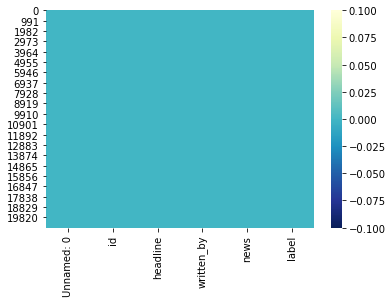

In [10]:
#Plotting heatmap for missing data
sns.heatmap(df.isnull(), cmap='YlGnBu_r')

After handling missing data, we can see that there is no missing data and the heatmap plotted above is clean. Next, we can proceed for data visualization from the features we have

# Exploratory Data Analysis (EDA)

In [11]:
#Checking the ratio of the label
print('Fake= ', round(len(df[df['label']==1]) / len(df.label),2)*100,'%')
print('Not Fake= ', round(len(df[df['label']==0]) / len(df.label),2)*100,'%')

Fake=  50.0 %
Not Fake=  50.0 %


<AxesSubplot:xlabel='label', ylabel='count'>

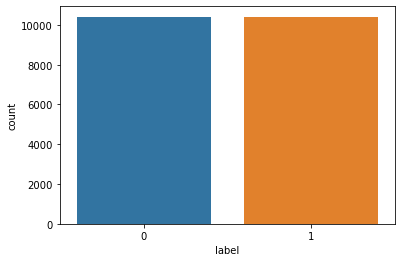

In [12]:
#Plotting the countplot for label
sns.countplot(df['label'])

We can see that the data is equally distributed and balanced well. But fake data(1) has the maximum value than not fake(0) and the difference between them is 26

<AxesSubplot:xlabel='headline', ylabel='Frequency'>

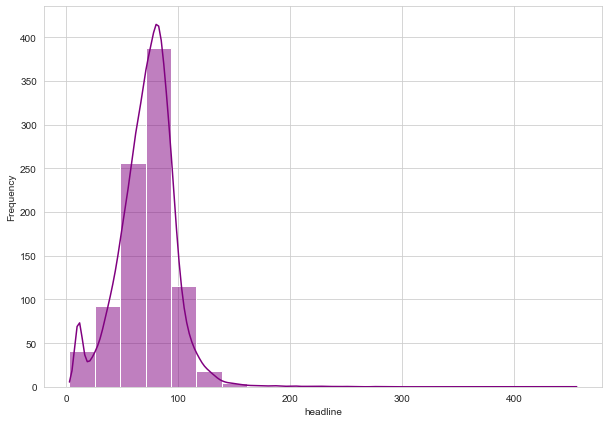

In [13]:
#Checking the distribution of headline length using histplot
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
headline_len = df.headline.str.len()
sns.histplot(headline_len, bins = 20, color = 'purple', stat = 'frequency', kde = True)

-> Majority of the comments are of length between 70 - 80, where the maximum length is above 400 and minimum length is 3. 

-> The median value from the plot is approximately 75.

<AxesSubplot:xlabel='written_by', ylabel='Frequency'>

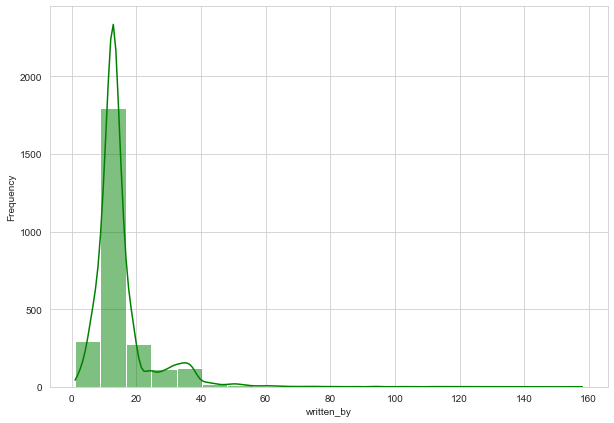

In [14]:
#Checking the distribution of written_by length using histplot
plt.figure(figsize=(10,7))
written_len = df.written_by.str.len()
sns.histplot(written_len, bins = 20, color = 'green', stat = 'frequency', kde = True)

We can see that the majority length of the author name is of 10 words and the maximum length is nearly 160 words

In [15]:
#Checking the value counts of written_by
df['written_by'].value_counts()

Not available                           1957
Pam Key                                  243
admin                                    193
Jerome Hudson                            166
Charlie Spiering                         141
                                        ... 
Bolofia                                    1
Josh                                       1
Michael M. Grynbaum and Sydney Ember       1
Goldbug                                    1
Timothy Williams and Monica Davey          1
Name: written_by, Length: 4202, dtype: int64

Most of the author names are not avaliable, as they were missing in the dataset and many of the names are unique

<AxesSubplot:xlabel='news', ylabel='Frequency'>

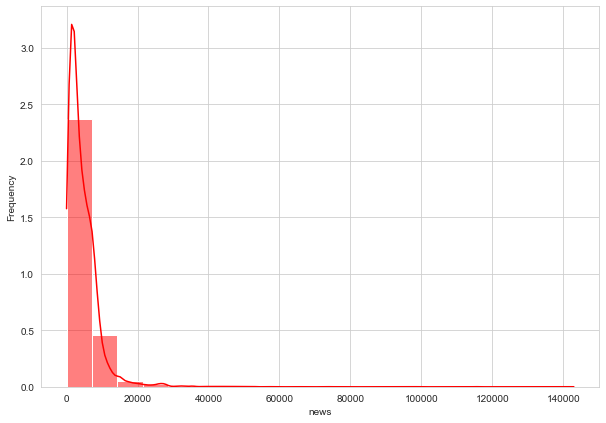

In [16]:
#Checking the distribution of news length using histplot
plt.figure(figsize=(10,7))
news_len = df.news.str.len()
sns.histplot(news_len, bins = 20, color = 'red', stat = 'frequency', kde = True)

Majority of the news are of length below 1000, where maximum length is above 140000.

In [17]:
#Checking the statistical summary of the dataset
df.describe()

Unnamed: 0            id         label
count  20800.000000  20800.000000  20800.000000
mean   10399.500000  10399.500000      0.500625
std     6004.587135   6004.587135      0.500012
min        0.000000      0.000000      0.000000
25%     5199.750000   5199.750000      0.000000
50%    10399.500000  10399.500000      1.000000
75%    15599.250000  15599.250000      1.000000
max    20799.000000  20799.000000      1.000000

-> Unnamed and id are the columns which are having the least importance data among all.

-> Label column has equal minimum and maximum value

-> Mean and standard deviation is same for them and the count is also equal.

# Data pre-processing

# Dropping unnecessary columns

In [18]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
#Checking the dataset after dropping
df.head()

headline  \
0  Ethics Questions Dogged Agriculture Nominee as...   
1  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2  Cotton to House: ’Do Not Walk the Plank and Vo...   
3  Paul LePage, Besieged Maine Governor, Sends Co...   
4                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

# Adding new features

In [19]:
#Creating new columns for printing the length of headline, author and news
df['length_headline'] = df.headline.str.len()
df['length_written_by'] = df.written_by.str.len()
df['length_news'] = df.news.str.len()
df.head()

headline  \
0  Ethics Questions Dogged Agriculture Nominee as...   
1  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2  Cotton to House: ’Do Not Walk the Plank and Vo...   
3  Paul LePage, Besieged Maine Governor, Sends Co...   
4                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  length_headline  \
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0               84   
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0               72   
2  Sunday on ABC’s “This Week,” while discussing ...      0              100   
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0              100   
4    Finian Cunningham has written extensively on...      1               28   

   length_written_by  length_news  
0                 26         7936  
1                 15         6112  
2                  7          425  
3                 12         6516  
4                 17         9164

In [20]:
#Converting the texts from the features in lowercase
df['headline'] = df.headline.str.lower()
df['written_by'] = df.written_by.str.lower()
df['news'] = df.news.str.lower()
df.head()

headline  \
0  ethics questions dogged agriculture nominee as...   
1  u.s. must dig deep to stop argentina’s lionel ...   
2  cotton to house: ’do not walk the plank and vo...   
3  paul lepage, besieged maine governor, sends co...   
4                       a digital 9/11 if trump wins   

                   written_by  \
0  eric lipton and steve eder   
1             david waldstein   
2                     pam key   
3                jess bidgood   
4           finian cunningham   

                                                news  label  length_headline  \
0  washington  —   in sonny perdue’s telling, geo...      0               84   
1  houston  —   venezuela had a plan. it was a ta...      0               72   
2  sunday on abc’s “this week,” while discussing ...      0              100   
3  augusta, me.  —   the beleaguered republican g...      0              100   
4    finian cunningham has written extensively on...      1               28   

   length_written_by  length_news  
0                 26         7936  
1                 15         6112  
2                  7          425  
3                 12         6516  
4                 17         9164

# Preprocessing using NLP

In [21]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [22]:
#Cleaning the data using regex operations 
#Function Definition
def clean_text(text):
    
    #Converting the text to lower case
    lowered_text = text.lower()
        
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing extra newline
    text = text.strip("\n")
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [23]:
#Applying the above custom function to the required features
df['headline'] = df['headline'].apply(lambda x: clean_text(x))
df['written_by'] = df['written_by'].apply(lambda x: clean_text(x))
df['news'] = df['news'].apply(lambda x: clean_text(x))

In [24]:
#Checking the feature after cleaning
df['news']

0        washington sonny perdue telling georgian growi...
1        houston venezuela plan tactical approach desig...
2        sunday abc week discussing republican plan rep...
3        augusta beleaguered republican governor maine ...
4        finian cunningham written extensively internat...
                               ...                        
20795                   dog licking vomit chinese overlord
20796    rixon stewart november rixon stewart nov migra...
20797    posted eddie know dakota access pipeline prote...
20798    officially summer society boutique society mem...
20799    emory university atlanta georgia announced fun...
Name: news, Length: 20800, dtype: object

In [25]:
df['headline']

0        ethic question dogged agriculture nominee geor...
1        u must dig deep stop argentina lionel messi ne...
2        cotton house walk plank vote bill pas senate b...
3        paul lepage besieged maine governor sends conf...
4                                        digital trump win
                               ...                        
20795                                             headline
20796                  albert pike european migrant crisis
20797    dakota access caught infiltrating protest inci...
20798                stretch summer solstice new york time
20799    emory university pay percent undocumented stud...
Name: headline, Length: 20800, dtype: object

In [26]:
#Creating new features for checking the length after cleaning of these 3 columns
df['Headlinelen_after_cleaning'] = df['headline'].map(lambda x: len(x))
df['WrittenBylen_after_cleaning'] = df['written_by'].map(lambda x: len(x))
df['Newslen_after_cleaning'] = df['news'].map(lambda x: len(x))
df  #Checking the dataset after creating the features

headline  \
0      ethic question dogged agriculture nominee geor...   
1      u must dig deep stop argentina lionel messi ne...   
2      cotton house walk plank vote bill pas senate b...   
3      paul lepage besieged maine governor sends conf...   
4                                      digital trump win   
...                                                  ...   
20795                                           headline   
20796                albert pike european migrant crisis   
20797  dakota access caught infiltrating protest inci...   
20798              stretch summer solstice new york time   
20799  emory university pay percent undocumented stud...   

                   written_by  \
0      eric lipton steve eder   
1             david waldstein   
2                     pam key   
3                jess bidgood   
4           finian cunningham   
...                       ...   
20795          neversurrender   
20796           rixon stewart   
20797             eddy lavine   
20798             alison cohn   
20799            tom ciccotta   

                                                    news  label  \
0      washington sonny perdue telling georgian growi...      0   
1      houston venezuela plan tactical approach desig...      0   
2      sunday abc week discussing republican plan rep...      0   
3      augusta beleaguered republican governor maine ...      0   
4      finian cunningham written extensively internat...      1   
...                                                  ...    ...   
20795                 dog licking vomit chinese overlord      1   
20796  rixon stewart november rixon stewart nov migra...      1   
20797  posted eddie know dakota access pipeline prote...      1   
20798  officially summer society boutique society mem...      0   
20799  emory university atlanta georgia announced fun...      0   

       length_headline  length_written_by  length_news  \
0                   84                 26         7936   
1                   72                 15         6112   
2                  100                  7          425   
3                  100                 12         6516   
4                   28                 17         9164   
...                ...                ...          ...   
20795               11                 14           69   
20796               43                 13         6621   
20797               84                 11         3433   
20798               55                 14         2334   
20799               93                 12         1932   

       Headlinelen_after_cleaning  WrittenBylen_after_cleaning  \
0                              72                           22   
1                              57                           15   
2                              54                            7   
3                              84                           12   
4                              17                           17   
...                           ...                          ...   
20795                           8                           14   
20796                          35                           13   
20797                          78                           11   
20798                          37                           11   
20799                          73                           12   

       Newslen_after_cleaning  
0                        5246  
1                        3947  
2                         259  
3                        4325  
4                        6515  
...                       ...  
20795                      34  
20796                    4309  
20797                    2490  
20798                    1588  
20799                    1418  

[20800 rows x 10 columns]

We can see that the new length features are created and then added to the dataset. Now, we will calculate the total words removed in all the 3 columns

In [27]:
#Checking the total length removed from the dataset for headline column
print("Original Length:", df.length_headline.sum(), '\n')
print("Cleaned Length:", df.Headlinelen_after_cleaning.sum(), '\n')
print("Total Words Removed:", (df.length_headline.sum()) - (df.Headlinelen_after_cleaning.sum()))

Original Length: 1510510 

Cleaned Length: 1163481 

Total Words Removed: 347029


In [28]:
#Checking the total length removed from the dataset for written_by column
print("Original Length:", df.length_written_by.sum(), '\n')
print("Cleaned Length:", df.WrittenBylen_after_cleaning.sum(), '\n')
print("Total Words Removed:", (df.length_written_by.sum()) - (df.WrittenBylen_after_cleaning.sum()))

Original Length: 314678 

Cleaned Length: 290849 

Total Words Removed: 23829


In [29]:
#Checking the total length removed from the dataset for news column
print("Original Length:", df.length_news.sum(), '\n')
print("Cleaned Length:", df.Newslen_after_cleaning.sum(), '\n')
print("Total Words Removed:", (df.length_news.sum()) - (df.Newslen_after_cleaning.sum()))

Original Length: 94519431 

Cleaned Length: 62940047 

Total Words Removed: 31579384


We can observe that more number of unwanted words were removed from the dataset and it was done by using regex operations and other NLP techniques.

# Plotting features before and after cleaning the data

## News

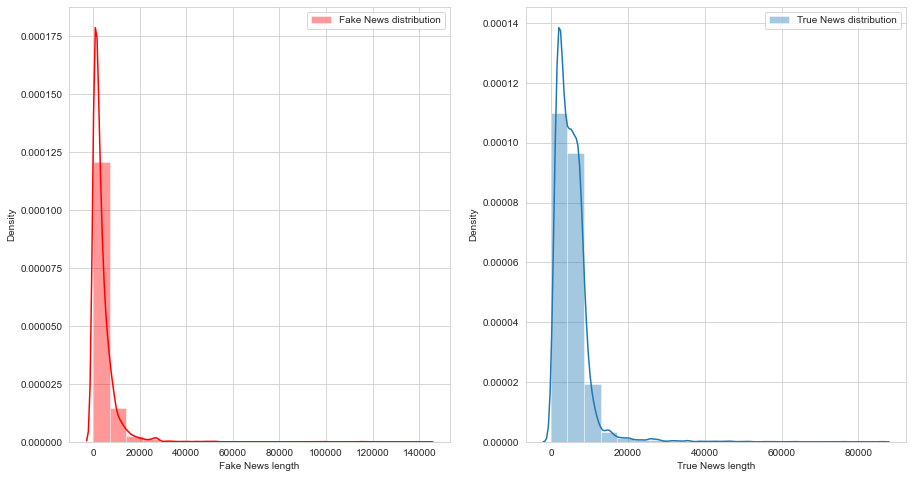

In [30]:
#News distribution before cleaning
f,ax=plt.subplots(1,2,figsize = (15,8))

#For fake news
sns.distplot(df[df['label']==1]['length_news'],bins=20,ax=ax[0],label='Fake News distribution',color='r')
ax[0].set_xlabel('Fake News length')
ax[0].legend()

#For true news
sns.distplot(df[df['label']==0]['length_news'],bins=20,ax=ax[1],label='True News distribution')
ax[1].set_xlabel('True News length')
ax[1].legend()

plt.show()

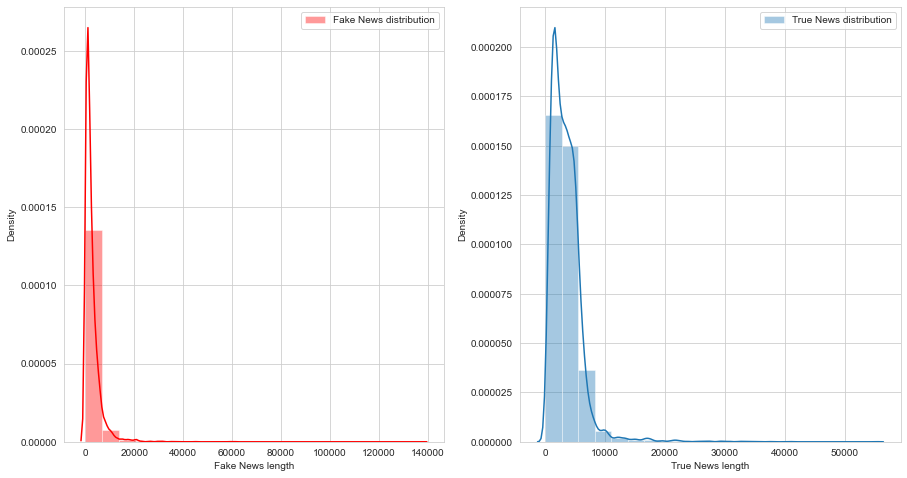

In [31]:
#News distribution AFTER cleaning
f,ax=plt.subplots(1,2,figsize = (15,8))

#For fake news
sns.distplot(df[df['label']==1]['Newslen_after_cleaning'],bins=20,ax=ax[0],label='Fake News distribution',color='r')
ax[0].set_xlabel('Fake News length')
ax[0].legend()

#For true news
sns.distplot(df[df['label']==0]['Newslen_after_cleaning'],bins=20,ax=ax[1],label='True News distribution')
ax[1].set_xlabel('True News length')
ax[1].legend()

plt.show()

-> We can see the effects in the graph after the removal of unwanted words and the values had been decreased in the plots respectively.

-> Maximum True News length value has been decreased from 80000 to 50000.

# Plotting Wordcloud for all 3 features

## For Fake data

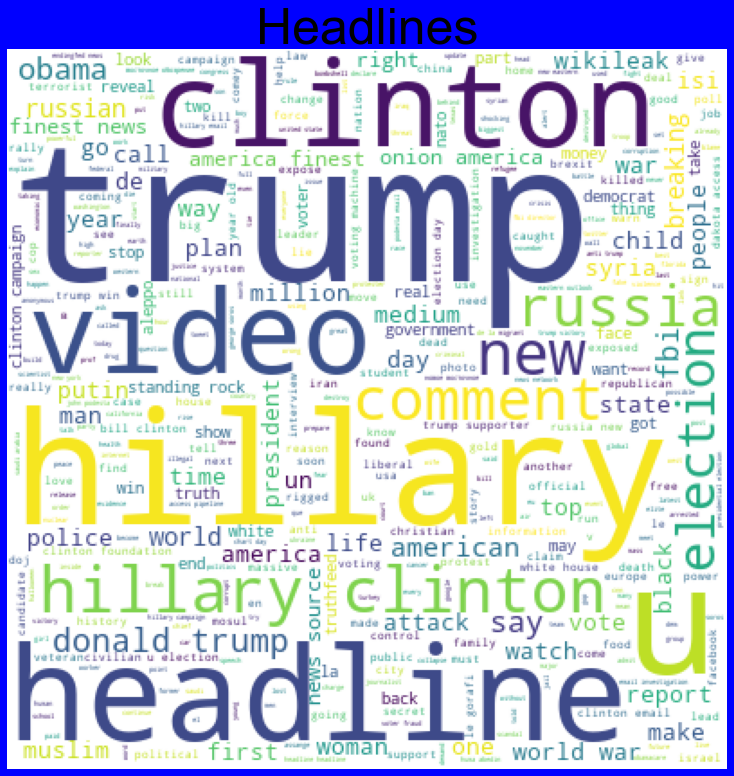

In [32]:
#Plotting for headlines
fake = df['headline'][df['label']==1]
wordcloud=WordCloud(height=400,width=400,background_color='white',max_words=400).generate(' '.join(fake))
plt.figure(figsize=(10,10),facecolor='b')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Headlines',fontdict={'fontsize':50, 'fontweight':50, 'color':'black'})
plt.show()

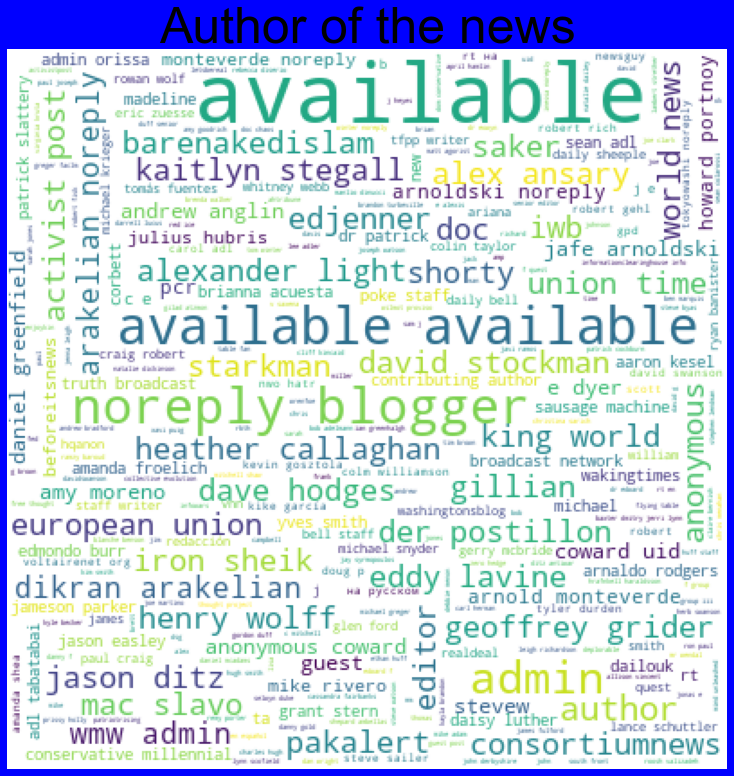

In [33]:
#Plotting for written_by
fake = df['written_by'][df['label']==1]
wordcloud=WordCloud(height=400,width=400,background_color='white',max_words=400).generate(' '.join(fake))
plt.figure(figsize=(10,10),facecolor='b')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Author of the news',fontdict={'fontsize':50, 'fontweight':50, 'color':'black'})
plt.show()

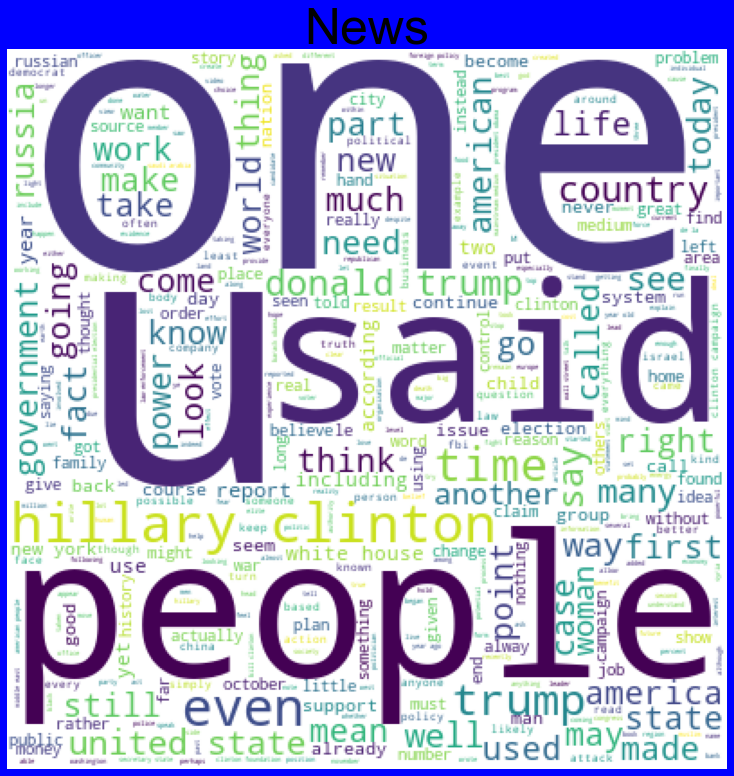

In [34]:
#Plotting for news
fake = df['news'][df['label']==1]
wordcloud=WordCloud(height=400,width=400,background_color='white',max_words=400).generate(' '.join(fake))
plt.figure(figsize=(10,10),facecolor='b')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='News',fontdict={'fontsize':50, 'fontweight':50, 'color':'black'})
plt.show()

## For True data

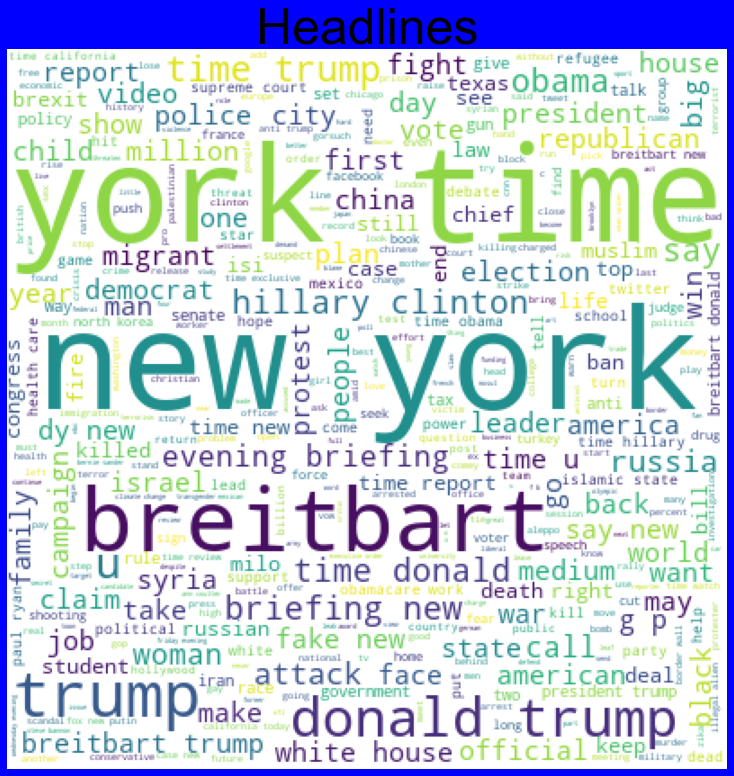

In [35]:
#Plotting for headlines
true_data = df['headline'][df['label']==0]
wordcloud=WordCloud(height=400,width=400,background_color='white',max_words=400).generate(' '.join(true_data))
plt.figure(figsize=(10,10),facecolor='b')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Headlines',fontdict={'fontsize':50, 'fontweight':50, 'color':'black'})
plt.show()

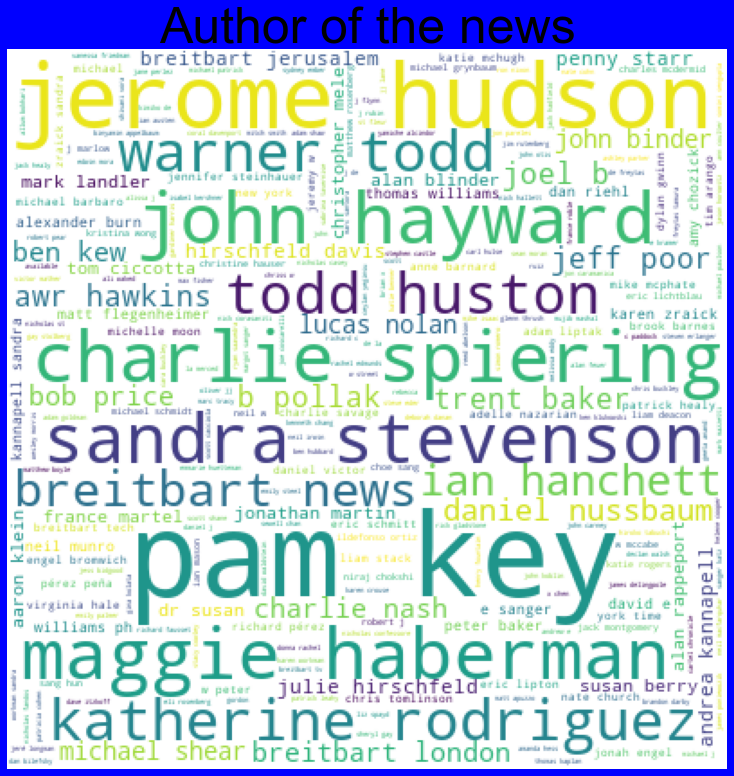

In [36]:
#Plotting for written_by
true_data = df['written_by'][df['label']==0]
wordcloud=WordCloud(height=400,width=400,background_color='white',max_words=400).generate(' '.join(true_data))
plt.figure(figsize=(10,10),facecolor='b')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Author of the news',fontdict={'fontsize':50, 'fontweight':50, 'color':'black'})
plt.show()

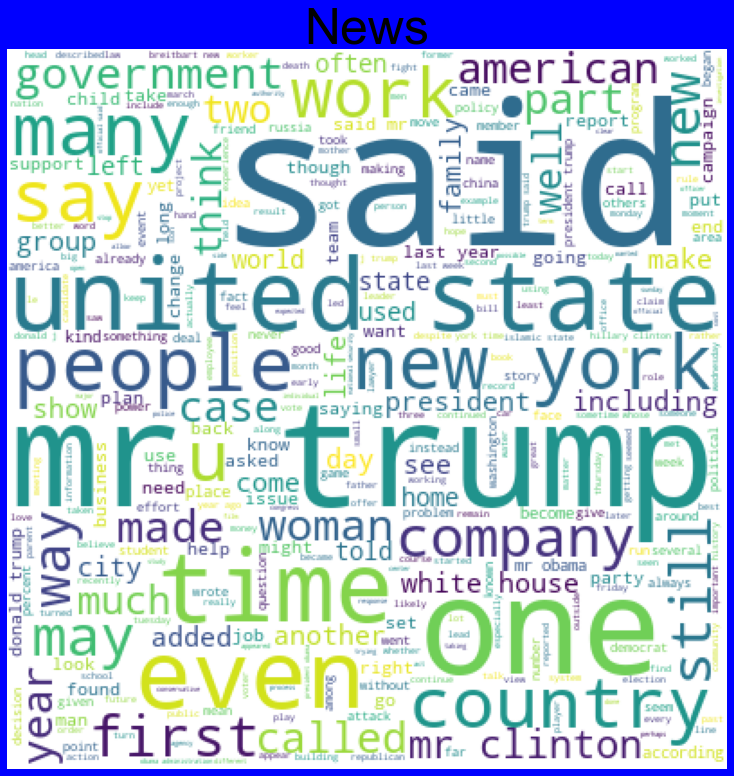

In [37]:
#Plotting for news
true_data = df['news'][df['label']==0]
wordcloud=WordCloud(height=400,width=400,background_color='white',max_words=400).generate(' '.join(true_data))
plt.figure(figsize=(10,10),facecolor='b')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='News',fontdict={'fontsize':50, 'fontweight':50, 'color':'black'})
plt.show()

From the above wordclouds, we can see that the large texts have more weightage in their respective type of comments whereas small texts have the lesser weightages

# Separating independent and dependent variables

In [38]:
#Before separating features, we need to convert the object data into number vectors and it can be done by using TF-IDF vectorizer
tf_vec = TfidfVectorizer(max_features=15000)
features = tf_vec.fit_transform(df['written_by'] + df['headline'] + df['news'])
#We are adding these features as we need to convert all of them together

In [39]:
#Let's Separate the input and output variables represented by X and y respectively
X=features
y=df['label']

In [40]:
print(X.shape,'\t\t', y.shape)    #Checking the shape of the data

(20800, 15000) 		 (20800,)


In [41]:
X  #Checking out X data

<20800x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 4918746 stored elements in Compressed Sparse Row format>

In [42]:
y #Checking out y data

0        0
1        0
2        0
3        0
4        1
        ..
20795    1
20796    1
20797    1
20798    0
20799    0
Name: label, Length: 20800, dtype: int64

Now that we have separated independent and dependent features, we need to do the model building process from the data we have

# Model Building 

In [43]:
#Initializing the instance of the model
LR=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [44]:
models= []
models.append(('Logistic Regression',LR))
models.append(('MultinomialNB',mnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))

In [45]:
#Splitting the data using train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.9487179487179487


cross_val_score:  0.9495673076923076


roc_auc_score:  0.9487145771114023


Log_loss : 1.7712408299262337


Classification report:
 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3116
           1       0.95      0.95      0.95      3124

    accuracy                           0.95      6240
   macro avg       0.95      0.95      0.95      6240
weighted avg       0.95      0.95      0.95      6240



Confusion matrix: 

[[2948  168]
 [ 152 2972]]




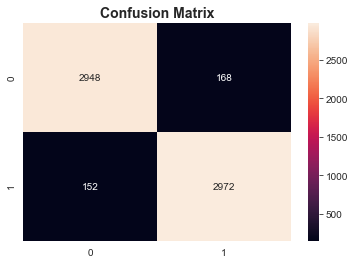

AUC_ROC curve:



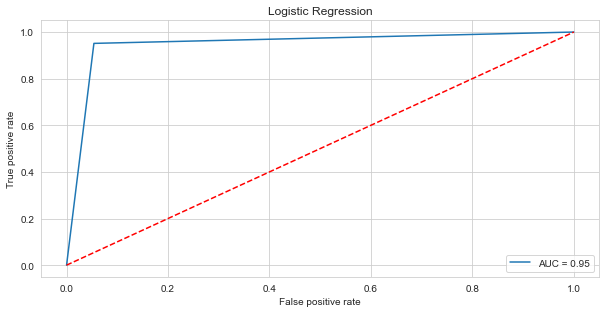





****************************** MultinomialNB ***************************


MultinomialNB()


accuracy_score:  0.9020833333333333


cross_val_score:  0.9055769230769231


roc_auc_score:  0.9021429604585149


Log_loss : 3.3819423578332146


Classification report:
 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3116
           1       0.94      0.86      0.90      3124

    accuracy                           0.90      6240
   macro avg       0.91      0.90      0.90      6240
weighted avg       0.91      0.90      0.90      6240



Confusion matrix: 

[[2956  160]
 [ 451 2673]]




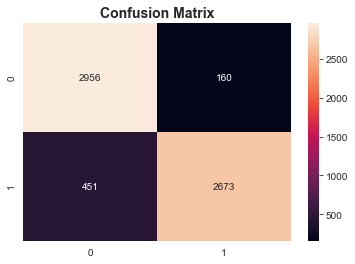

AUC_ROC curve:



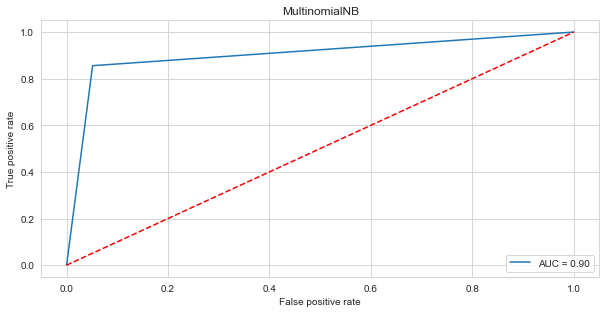





****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier()


accuracy_score:  0.9150641025641025


cross_val_score:  0.9222115384615384


roc_auc_score:  0.9150701266767368


Log_loss : 2.933614004592983


Classification report:
 
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3116
           1       0.92      0.91      0.91      3124

    accuracy                           0.92      6240
   macro avg       0.92      0.92      0.92      6240
weighted avg       0.92      0.92      0.92      6240



Confusion matrix: 

[[2866  250]
 [ 280 2844]]




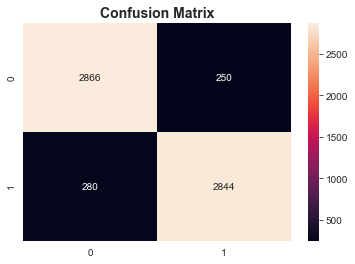

AUC_ROC curve:



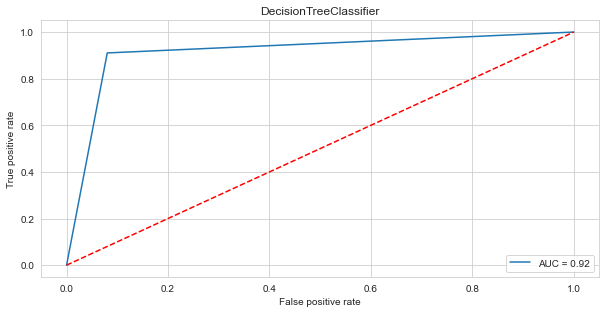





****************************** KNeighborsClassifier ***************************


KNeighborsClassifier()


accuracy_score:  0.5860576923076923


cross_val_score:  0.5950480769230768


roc_auc_score:  0.5855353559095264


Log_loss : 14.297388973889909


Classification report:
 
              precision    recall  f1-score   support

           0       0.96      0.18      0.30      3116
           1       0.55      0.99      0.71      3124

    accuracy                           0.59      6240
   macro avg       0.75      0.59      0.50      6240
weighted avg       0.75      0.59      0.50      6240



Confusion matrix: 

[[ 555 2561]
 [  22 3102]]




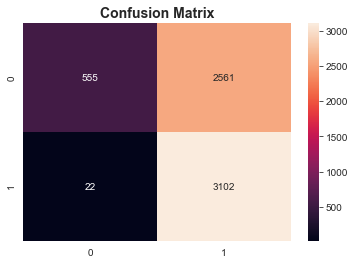

AUC_ROC curve:



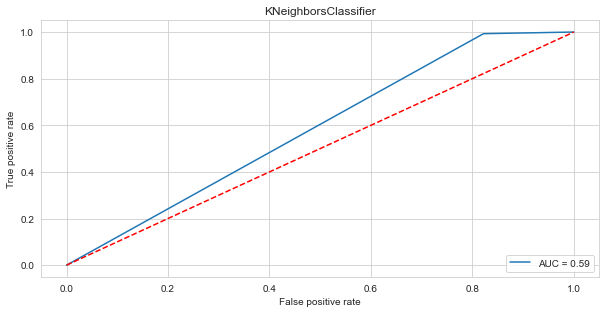





****************************** RandomForestClassifier ***************************


RandomForestClassifier()


accuracy_score:  0.95


cross_val_score:  0.952548076923077


roc_auc_score:  0.950017998057196


Log_loss : 1.7269531714942818


Classification report:
 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3116
           1       0.96      0.94      0.95      3124

    accuracy                           0.95      6240
   macro avg       0.95      0.95      0.95      6240
weighted avg       0.95      0.95      0.95      6240



Confusion matrix: 

[[3004  112]
 [ 200 2924]]




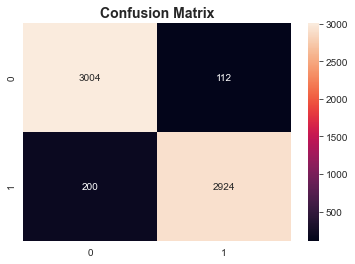

AUC_ROC curve:



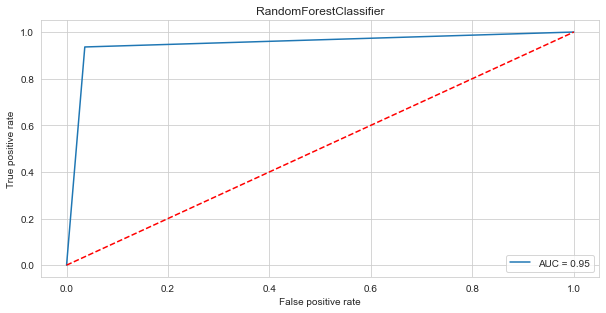





****************************** AdaBoostClassifier ***************************


AdaBoostClassifier()


accuracy_score:  0.9419871794871795


cross_val_score:  0.9403365384615384


roc_auc_score:  0.9419817422448097


Log_loss : 2.003716695009476


Classification report:
 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3116
           1       0.94      0.95      0.94      3124

    accuracy                           0.94      6240
   macro avg       0.94      0.94      0.94      6240
weighted avg       0.94      0.94      0.94      6240



Confusion matrix: 

[[2922  194]
 [ 168 2956]]




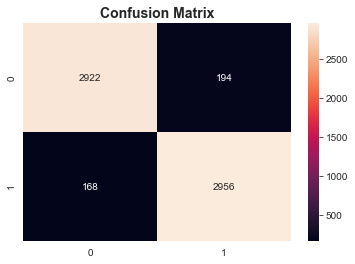

AUC_ROC curve:



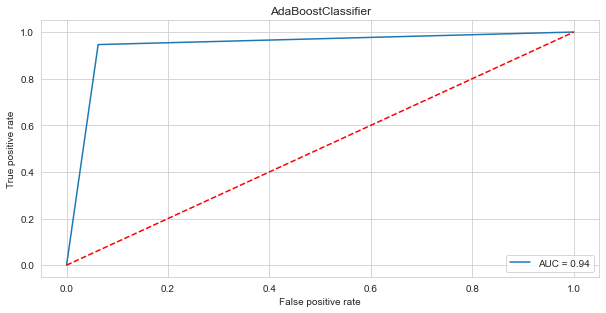





****************************** GradientBoostingClassifier ***************************


GradientBoostingClassifier()


accuracy_score:  0.9424679487179487


cross_val_score:  0.9440384615384614


roc_auc_score:  0.942457375833951


Log_loss : 1.987112923597136


Classification report:
 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3116
           1       0.94      0.95      0.94      3124

    accuracy                           0.94      6240
   macro avg       0.94      0.94      0.94      6240
weighted avg       0.94      0.94      0.94      6240



Confusion matrix: 

[[2911  205]
 [ 154 2970]]




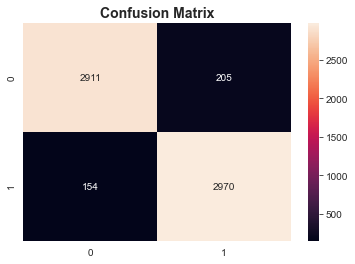

AUC_ROC curve:



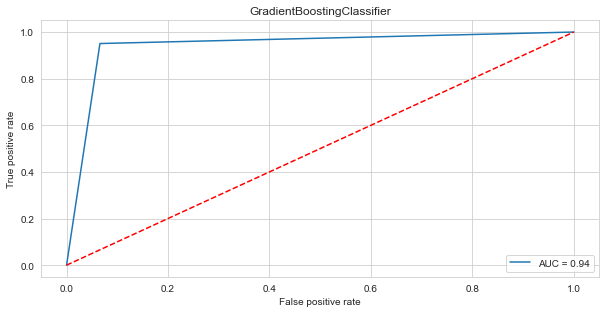

In [46]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
l_loss=[]
precision=[]
recall=[]
f1score=[]    #Empty lists

for name,model in models:
    #Fitting the model 
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    print(model)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    print('\n')
    
    #Accuracy score
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    
    #Cross-validation score
    sc=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    
    #Calculating roc_auc score
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score: ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    #Calculating log loss
    try: 
        loss=log_loss(y_test, pre)
    except:
        loss=log_loss(y_test, pre.toarray())   
    print("Log_loss :", loss)
    l_loss.append(loss)
    print('\n')
    
    #Calculating classification report
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    
    #Appending precision, recall and f1_score to the list
    precision.append(precision_score(y_test,pre))
    recall.append(recall_score(y_test,pre))
    f1score.append(f1_score(y_test,pre))
    print('\n')
    
    #Calculating confusion matrix
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    
    #Plotting the confusion matrix using heatmap
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix', size=14, weight='bold', loc='center')
    plt.show()
    
    #Plotting AUC_ROC curve
    plt.figure(figsize=(10,50))
    plt.subplot(912)
    print('AUC_ROC curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')

In [47]:
#Printing the results in a dataFrame
results = pd.DataFrame({"Model" : Model,
                        'accuracy_score' : score,
                        'cross_validation_score' : cvs,
                        'log_loss': l_loss,
                        'AUC_ROC Score' : rocscore,
                        'Precision' : precision,
                        'Recall' : recall,
                        'f1_score' : f1score
                        })
results

Model  accuracy_score  cross_validation_score  \
0         Logistic Regression       94.871795               94.956731   
1               MultinomialNB       90.208333               90.557692   
2      DecisionTreeClassifier       91.506410               92.221154   
3        KNeighborsClassifier       58.605769               59.504808   
4      RandomForestClassifier       95.000000               95.254808   
5          AdaBoostClassifier       94.198718               94.033654   
6  GradientBoostingClassifier       94.246795               94.403846   

    log_loss  AUC_ROC Score  Precision    Recall  f1_score  
0   1.771241      94.871458   0.946497  0.951344  0.948914  
1   3.381942      90.214296   0.943523  0.855634  0.897432  
2   2.933614      91.507013   0.919198  0.910371  0.914764  
3  14.297389      58.553536   0.547766  0.992958  0.706043  
4   1.726953      95.001800   0.963109  0.935980  0.949351  
5   2.003717      94.198174   0.938413  0.946223  0.942302  
6   1.987113      94.245738   0.935433  0.950704  0.943007

After running the algorithms and according to the scores of performance metrics and other scores, we can see that Logistic Regression and RandomForest Classifier algorithms are performing well. Now, we will perform Hyperparameter Tuning to find out the best parameters and try to increase the scores

# Hyperparameter Tuning

## Logistic Regression

In [48]:
#Parameters list to pass in GridSearchCV
parameters={'penalty':['l1','l2','elasticnet'],'C':[10, 1, 0.1, 0.01,0.001,0.001]}

In [49]:
#Using GridSearchCV to run the parameters and checking final accuracy
LR=LogisticRegression()
grid=GridSearchCV(LR,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'C': 10, 'penalty': 'l2'}
0.9567307692307692


In [50]:
#Using the best parameters obtained
LR=LogisticRegression(C=10,penalty='l2')
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pre)*100)
print('Cross validation score: ',cross_val_score(LR,X,y,cv=5,scoring='accuracy').mean()*100)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc= auc(false_positive_rate,true_positive_rate)
print('roc_auc_score: ',roc_auc)
loss = log_loss(y_test, pre)
print("Log loss:", loss)
print('Classification report: \n')
print(classification_report(y_test,pre))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pre))

Accuracy score:  94.24679487179488
Cross validation score:  96.29326923076921
roc_auc_score:  0.942457375833951
Log loss: 1.987112923597136
Classification report: 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3116
           1       0.94      0.95      0.94      3124

    accuracy                           0.94      6240
   macro avg       0.94      0.94      0.94      6240
weighted avg       0.94      0.94      0.94      6240

Confusion matrix: 

[[2911  205]
 [ 154 2970]]


## RandomForest Classifier

In [51]:
#Parameters list to pass in GridSearchCV
parameters={'n_estimators':[50,100,500],'criterion':['gini','entropy'], 'max_features':['auto','sqrt','log2']}

In [53]:
#Using GridSearchCV to run the parameters and checking final accuracy
rfc=RandomForestClassifier()
grid=GridSearchCV(rfc,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 500}
0.9542582417582418


In [55]:
#Using the best parameters obtained
rfc=RandomForestClassifier(n_estimators=500, criterion='gini', max_features='auto')
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pre)*100)
print('Cross validation score: ',cross_val_score(rfc,X,y,cv=5,scoring='accuracy').mean()*100)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc= auc(false_positive_rate,true_positive_rate)
print('roc_auc_score: ',roc_auc)
loss = log_loss(y_test, pre)
print("Log loss:", loss)
print('Classification report: \n')
print(classification_report(y_test,pre))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pre))

Accuracy score:  94.24679487179488
Cross validation score:  95.74519230769232
roc_auc_score:  0.942457375833951
Log loss: 1.987112923597136
Classification report: 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3116
           1       0.94      0.95      0.94      3124

    accuracy                           0.94      6240
   macro avg       0.94      0.94      0.94      6240
weighted avg       0.94      0.94      0.94      6240

Confusion matrix: 

[[2911  205]
 [ 154 2970]]


After hyperparameter Tuning we can see that LogisticRegression is performing well as the cross validation score is better than RandomForest Classifier. Therefore, we will consider Logistic Regression as our final best model.

# Finalizing the model

In [56]:
lr_prediction=LR.predict(X)
print('Predictions of Logistic Regression: ',lr_prediction)

Predictions of Logistic Regression:  [0 0 0 ... 1 0 0]


In [57]:
#Saving the model
import joblib
joblib.dump(LR,'Fake_News_Classifier.pkl')

['Fake_News_Classifier.pkl']

In [58]:
pred_results=pd.DataFrame(lr_prediction)
pred_results.to_csv('FakeNews_Results.csv')

# Conclusion 

-> After the completion of this project, we got an insight of how to preprocess the data, analyzing the data and building a model.

-> First, we imported the dataset which had nearly 20000 records.

-> We did all the required pre-processing steps like checking null values, datatypes check, dropping unnecessary columns, etc.

-> We did the Exploratory Data Analysis using various plots and recorded the observations.

-> Using NLP, we pre-processed the comment text and did other steps like:

- Removing Punctuations and other special characters

- Splitting the comments into individual words

- Removing Stop Words

- Stemming and Lemmatising

- Applying Count Vectoriser

- Plotting wordcloud for knowing the weightage of words used

-> We created many new features like length of words before pre-processing and after pre-processing inorder to know the words cleaned after the necessary steps.

-> We applied Tf-idf Vectorizer for scaling the data into number vectors and for x feature we combined the written_by, news and headlines together.

-> Then, we split the data using train_test_split and then we started the model building process by running as many algorithms in a for loop, with difference metrics like cross_val_score, confusion matrix, auc_score, log loss, precision, recall, f1_score, etc.

-> We found that LogisticRegression and RandomForestClassifier were performing well. The next step was to perform hyperparameter tuning technique to these models for finding out the best parameters and trying to improve our scores.

-> LogisticRegression Algorithm gave us good scores and metric values than RandomForestClassifier and therefore we finalized it as the best model.

-> We finalized the model by predicting the outputs, saving the model and storing the results in a csv file


## Problems faced while working in this project:

- More computational power was required.

- More missing data were present in the dataset.

- Loss was more for some algorithms.